# SDSS DR7 Spectra catalog with LSDB 

In [20]:
%pip install git+https://github.com/astronomy-commons/hats
%pip install git+https://github.com/astronomy-commons/lsdb

  Cloning https://github.com/astronomy-commons/hats to /private/var/folders/w1/lh3h4s7d5g10rdlfj4h0mshw0000gn/T/pip-req-build-eomadwgt
  Running command git clone --filter=blob:none --quiet https://github.com/astronomy-commons/hats /private/var/folders/w1/lh3h4s7d5g10rdlfj4h0mshw0000gn/T/pip-req-build-eomadwgt
  Resolved https://github.com/astronomy-commons/hats to commit 499c66aa5db1d9f1b8bd10e3a2741b1f0e673e10
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/astronomy-commons/lsdb to /private/var/folders/w1/lh3h4s7d5g10rdlfj4h0mshw0000gn/T/pip-req-build-239kha3_
  Running command git clone --filter=blob:none --quiet https://github.com/astronomy-commons/lsdb /private/var/folders/w1/lh3h4s7d5g10rdlfj4h0mshw0000gn/T/pip-req-build-239kha3_
  Resolved https://github.com/astronomy-commons/lsdb to commit 2225b1ef

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from lsdb import read_hats

In [22]:
CATALOG = "ssh://kmalanch@epyc.astro.washington.edu/data3/epyc/data3/hats/catalogs/sdss_dr7/sdss_dr7_spectra/"

raw_catalog = read_hats(CATALOG)

# Pack spectra
SED_COLUMNS = ["flux", "ivar"] 
catalog = raw_catalog.nest_lists(
    base_columns=[col for col in raw_catalog.columns if col not in SED_COLUMNS],
    name="sed",
)
catalog

,OBJID,HOLETYPE,RA,DEC,MAG,STARL,EXPL,DEVAUCL,OBJTYPE,XFOCAL,YFOCAL,SPECTROGRAPHID,FIBERID,THROUGHPUT,PRIMTARGET,SECTARGET,OFFSETID,SCI_EXPTIME,CALIBFLUX,CALIBFLUX_IVAR,SFD_EBV,andmask,ormask,wavedisp,skyflux,__index_level_0__,Norder,Dir,Npix,sed
npartitions=1304,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,list<element: int32>[pyarrow],binary[pyarrow],double[pyarrow],double[pyarrow],list<element: float>[pyarrow],float[pyarrow],float[pyarrow],float[pyarrow],binary[pyarrow],double[pyarrow],double[pyarrow],int32[pyarrow],int32[pyarrow],int32[pyarrow],int32[pyarrow],int32[pyarrow],int32[pyarrow],float[pyarrow],list<element: float>[pyarrow],list<element: float>[pyarrow],float[pyarrow],list<element: int32>[pyarrow],list<element: int32>[pyarrow],list<element: double>[pyarrow],list<element: double>[pyarrow],int64[pyarrow],uint8[pyarrow],uint64[pyarrow],uint64[pyarrow],"nested<flux: [list<element: double>], ivar: [l..."
1125899906842624,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3457638613913698304,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3458764513820540928,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [23]:
ndf = catalog.head(5)

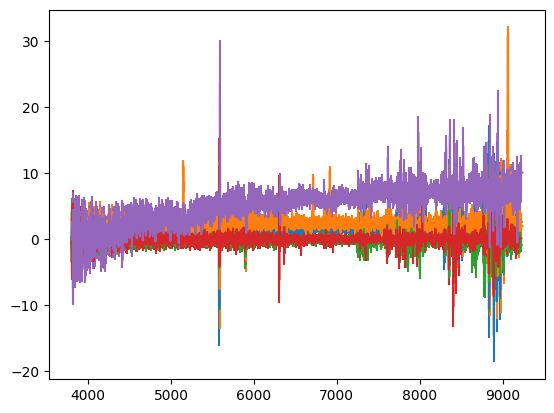

In [25]:
# Plot few spectra

# Values from the FITS header
COEFF0 = 3.5797    # Central wavelength (log10) of the first pixel
COEFF1 = 0.0001    # Log10 dispersion per pixel
CRPIX1 = 1         # Starting pixel (1-indexed)

for sed in ndf["sed"]:
    waves = 10**(COEFF0 + COEFF1 * (np.arange(sed.shape[0]) + 1 - CRPIX1))
    plt.errorbar(waves, sed["flux"], np.sqrt(1/sed["ivar"]))